In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brfss = pd.read_sas('LLCP2020.XPT')

In [3]:
brfss[['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']].dtypes

ACEDEPRS    float64
ACEDRINK    float64
ACEDRUGS    float64
ACEPRISN    float64
ACEDIVRC    float64
ACEPUNCH    float64
ACEHURT1    float64
ACESWEAR    float64
ACETOUCH    float64
ACETTHEM    float64
ACEHVSEX    float64
dtype: object

combine cancer vars

new lgbtq var - combine so, trans to just a y/n

combine 1&2 for persdoc2 

race to dummy categories 

language, hlthcvr1, educag to dummy cats

create sum disability cat (incl cdassist) 

aces count 

In [4]:
#RECODING SOME DUMMIES 
def dumb_recode(item): 
    if item == 2: 
        return 0
    elif item == 1:
        return 1
    else: 
        return np.NaN

In [5]:
#health factors/conditions
brfss['EXERANY2'] = brfss['EXERANY2'].apply(dumb_recode)
brfss['_LTASTH1'] = brfss['_LTASTH1'].apply(dumb_recode)
brfss['ADDEPEV3'] = brfss['ADDEPEV3'].apply(dumb_recode)
brfss['ACEDRINK'] = brfss['ACEDRINK'].apply(dumb_recode)
brfss['ACEDRUGS'] = brfss['ACEDRUGS'].apply(dumb_recode)
brfss['ACEPRISN'] = brfss['ACEPRISN'].apply(dumb_recode)
brfss['ACEDIVRC'] = brfss['ACEDIVRC'].apply(dumb_recode)
brfss['ACEDEPRS'] = brfss['ACEDEPRS'].apply(dumb_recode)

#non dummy to include: smoking, drinks/wk, diabetes, bmi, genhealth
brfss["GENHLTH"]=brfss["GENHLTH"].replace([7,9], np.NaN)
brfss["_SMOKER3"]=brfss["_SMOKER3"].replace(9, np.NaN)
brfss["_DRNKWK1"]=brfss["_DRNKWK1"].replace(99900, np.NaN)

#also add cancer 


#ACEs recode 

def ace_recode(var):
    if var == 2.0 or var ==3.0: 
        return 1
    else:
        return 0
    

#aces     
brfss['ACEPUNCH'] = brfss['ACEPUNCH'].apply(ace_recode)
brfss['ACEHURT1'] = brfss['ACEHURT1'].apply(ace_recode)
brfss['ACESWEAR'] = brfss['ACESWEAR'].apply(ace_recode)
brfss['ACETOUCH'] = brfss['ACETOUCH'].apply(ace_recode)
brfss['ACETTHEM'] = brfss['ACETTHEM'].apply(ace_recode)
brfss['ACEHVSEX'] = brfss['ACEHVSEX'].apply(ace_recode)


#brfss[['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC']] = brfss[['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC']].apply(ace_recode2)
#brfss[['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']] = brfss[['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']].apply(ace_recode)

col_list= ['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']
brfss['aces'] = brfss[col_list].sum(axis=1)

In [6]:
brfss['aces'].value_counts()

#combining any above 4 bc thats what the cdc does 

0.0     324099
1.0      28975
2.0      16051
3.0      10545
4.0       7424
5.0       5145
6.0       3590
7.0       2512
8.0       1727
9.0        951
10.0       617
11.0       322
Name: aces, dtype: int64

In [7]:
#health access vars 

#check NAs 
brfss["CHECKUP1"]=brfss["CHECKUP1"].replace([7,8,9], np.NaN)
brfss["LASTDEN4"]=brfss["LASTDEN4"].replace([7,8,9], np.NaN)

#rearranging so having a doctor = 1 and not having a regular doctor = 0
brfss.PERSDOC2[brfss.PERSDOC2==2] = 1
brfss.PERSDOC2[brfss.PERSDOC2==3] = 0
brfss["PERSDOC2"]=brfss["PERSDOC2"].replace([7,9], np.NaN)

              
brfss['MEDCOST'] = brfss['MEDCOST'].apply(dumb_recode)
brfss['HLTHPLN1'] = brfss['HLTHPLN1'].apply(dumb_recode)


<ipython-input-7-5cd41f23f5fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-7-5cd41f23f5fb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
#demographic dummies
brfss['VETERAN3'] = brfss['VETERAN3'].apply(dumb_recode)
brfss['SEXVAR'] = brfss['SEXVAR'].apply(dumb_recode)
brfss['_URBSTAT'] = brfss['_URBSTAT'].apply(dumb_recode)
#recoding male/female sexual orientation and transgender var to lgbtq dummy var
brfss['lgbtq'] = np.where(brfss['SOMALE']==1,1, np.where(brfss['SOMALE']==3,1, np.where(brfss['SOMALE']==4,1, np.where(brfss['SOFEMALE']==1,1, np.where(brfss['SOFEMALE']==3,1, np.where(brfss['SOFEMALE']==4,1, np.where(brfss['TRNSGNDR']==1,1, np.where(brfss['TRNSGNDR']==2,1,  np.where(brfss['TRNSGNDR']==3,1,0)))))))))
#turning all disability markers into single disability dummy 
brfss['dis'] = np.where(brfss['DEAF']==1,1, np.where(brfss['BLIND']==1,1, np.where(brfss['DECIDE']==1,1, np.where(brfss['DIFFWALK']==1,1, np.where(brfss['DIFFDRES']==1,1, np.where(brfss['DIFFALON']==1,1, np.where(brfss['CDASSIST']<3, 1, 0)))))))

#recoding work to a big dummy 
brfss['jobhaver'] = np.where(brfss['EMPLOY1']==1,1, np.where(brfss['EMPLOY1']==2,1,0))



#missing codes
brfss["_RACE"]=brfss["_RACE"].replace(9, np.NaN)
brfss["MARITAL"]=brfss["MARITAL"].replace(9, np.NaN)
#brfss["QSTLANG"]=brfss["QSTLANG"].replace(20, np.NaN)
#brfss["ENGSPK"]=brfss["QSTLANG"].replace(2, 0)
brfss["_EDUCAG"]=brfss["_EDUCAG"].replace(9, np.NaN)
#brfss["EMPLOY1"]=brfss["EMPLOY1"].replace(9, np.NaN)
brfss["RENTHOM1"]=brfss["RENTHOM1"].replace([7,9], np.NaN)
brfss["INCOME2"]=brfss["INCOME2"].replace([77,99], np.NaN)
                                       
                                       
#race, marital status, homeownership, employment, language need to be converted to categorical dummies 




In [9]:
brfss2 = brfss[['_STATE','VETERAN3','SEXVAR','_URBSTAT','lgbtq','dis','_RACE','_AGE_G','MARITAL','_EDUCAG','jobhaver','RENTHOM1','INCOME2','PERSDOC2','CHECKUP1','LASTDEN4','MEDCOST','HLTHPLN1','GENHLTH','_SMOKER3','_DRNKWK1','EXERANY2','_LTASTH1','ADDEPEV3','aces']]
brfss2

,_STATE,VETERAN3,SEXVAR,_URBSTAT,lgbtq,dis,_RACE,_AGE_G,MARITAL,_EDUCAG,...,LASTDEN4,MEDCOST,HLTHPLN1,GENHLTH,_SMOKER3,_DRNKWK1,EXERANY2,_LTASTH1,ADDEPEV3,aces
0,1.0,0.0,0,1.0,0,1,1.0,5.0,2.0,4.0,...,1.0,1.0,0.0,2.0,1.0,5.397605e-79,1.0,0.0,1.0,8.0
1,1.0,0.0,0,1.0,0,0,2.0,6.0,3.0,4.0,...,1.0,1.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
2,1.0,0.0,0,1.0,0,0,2.0,6.0,1.0,3.0,...,1.0,0.0,1.0,3.0,4.0,5.397605e-79,1.0,1.0,0.0,1.0
3,1.0,0.0,0,1.0,0,0,1.0,6.0,3.0,2.0,...,NaN,0.0,1.0,1.0,4.0,5.397605e-79,0.0,1.0,0.0,0.0
4,1.0,0.0,0,1.0,0,0,1.0,6.0,3.0,4.0,...,NaN,0.0,1.0,2.0,4.0,5.397605e-79,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,0.0,0,NaN,0,1,8.0,4.0,2.0,3.0,...,2.0,0.0,0.0,3.0,4.0,5.397605e-79,1.0,1.0,1.0,0.0
401954,72.0,0.0,0,NaN,0,0,8.0,2.0,1.0,1.0,...,1.0,0.0,1.0,3.0,4.0,5.397605e-79,0.0,1.0,0.0,0.0
401955,72.0,0.0,0,NaN,0,0,8.0,6.0,1.0,2.0,...,1.0,0.0,1.0,3.0,4.0,5.397605e-79,1.0,1.0,0.0,0.0
401956,72.0,0.0,1,NaN,0,1,8.0,5.0,1.0,4.0,...,1.0,0.0,1.0,3.0,NaN,2.000000e+02,1.0,1.0,0.0,0.0


In [10]:
qoc = pd.read_csv("QOC.csv")
qoc

,state,domain,reporting_program,measure_name,measure_abbreviation,measure_type,rate_definition,ffy,population,methodology,state_rate,number_of_states_reporting,median,bottom_quartile,top_quartile,notes,source,statespecific_comments,rate_used_in_calculating_state_mean_and_median
0,Alabama,Behavioral Health Care,Adult Core Set,Adherence to Antipsychotic Medications for Ind...,SAA-AD,Higher rates are better for this measure,Percentage with Schizophrenia or Schizoaffecti...,2020,Medicaid,Administrative,79.3,43,62.5,56.6,67.0,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS and PCCM populations. Rate e...,Yes
1,Alabama,Behavioral Health Care,Adult Core Set,Antidepressant Medication Management: Age 18 a...,AMM-AD,Higher rates are better for this measure,Percentage Diagnosed with Major Depression who...,2020,Medicaid,Administrative,52.5,43,53.1,47.5,57.4,NaN,Mathematica analysis of MACPro reports for the...,Rates include FFS and PCCM populations. Rates ...,Yes
2,Alabama,Behavioral Health Care,Adult Core Set,Antidepressant Medication Management: Age 18 a...,AMM-AD,Higher rates are better for this measure,Percentage Diagnosed with Major Depression who...,2020,Medicaid,Administrative,24.3,42,37.3,29.9,41.1,NaN,Mathematica analysis of MACPro reports for the...,Rates include FFS and PCCM populations. Rates ...,Yes
3,Alabama,Behavioral Health Care,Adult Core Set,Concurrent Use of Opioids and Benzodiazepines:...,COB-AD,Lower rates are better for this measure,Percentage with Concurrent Use of Prescription...,2020,Medicaid,Administrative,20.6,27,16.3,21.6,11.2,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS and PCCM populations. Rate e...,Yes
4,Alabama,Behavioral Health Care,Adult Core Set,Diabetes Screening for People with Schizophren...,SSD-AD,Higher rates are better for this measure,"Percentage with Schizophrenia, Schizoaffective...",2020,Medicaid,Administrative,77.6,44,80.3,77.3,82.5,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS and PCCM populations. Rate e...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,Wyoming,Maternal and Perinatal Health,Adult Core Set,Prenatal and Postpartum Care: Postpartum Care,PPC-AD,Higher rates are better for this measure,Percentage of Women Delivering a Live Birth wh...,2020,Medicaid & Dual Eligibles,Administrative,39.9,39,72.3,65.7,77.0,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
1768,Wyoming,Primary Care Access and Preventive Care,Adult Core Set,Adult Body Mass Index Assessment: Ages 18 to 74,ABA-AD,Higher rates are better for this measure,Percentage who had an Outpatient Visit with a ...,2020,Medicaid & Dual Eligibles,Administrative,24.7,39,85.6,64.1,91.7,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
1769,Wyoming,Primary Care Access and Preventive Care,Adult Core Set,Breast Cancer Screening: Ages 50 to 74,BCS-AD,Higher rates are better for this measure,Percentage of Women who had a Mammogram to Scr...,2020,Medicaid & Dual Eligibles,Administrative,35.2,47,54.7,50.4,59.5,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
1770,Wyoming,Primary Care Access and Preventive Care,Adult Core Set,Cervical Cancer Screening: Ages 21 to 64,CCS-AD,Higher rates are better for this measure,Percentage of Women Screened for Cervical Canc...,2020,Medicaid & Dual Eligibles,Administrative,38.1,47,56.7,49.3,62.6,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes


In [11]:
qoc['state_rate'] =qoc['state_rate'].replace(["NR","DS","#"], np.NaN)
qoc['state_rate'] =pd.to_numeric(qoc.state_rate)

In [12]:
new = pd.pivot_table(qoc, values = 'state_rate', index = ['state'], columns = ["rate_definition"])

In [13]:
#making negative the columns where lower is better. for reasons 
new["Percentage Without Cancer who Received Prescriptions for Opioids with an Average Daily Dosage Greater than or Equal to 90 Morphine Milligram Equivalents Over 90 Consecutive Days or More: Ages 18 to 64"]= new["Percentage Without Cancer who Received Prescriptions for Opioids with an Average Daily Dosage Greater than or Equal to 90 Morphine Milligram Equivalents Over 90 Consecutive Days or More: Ages 18 to 64"]*-1
new['Inpatient Hospital Admissions for Chronic Obstructive Pulmonary Disease (COPD) or Asthma per 100,000 Beneficiary Months: Ages 40 to 64']=new['Inpatient Hospital Admissions for Chronic Obstructive Pulmonary Disease (COPD) or Asthma per 100,000 Beneficiary Months: Ages 40 to 64']*-1
new['Inpatient Hospital Admissions for Asthma per 100,000 Beneficiary Months: Ages 18 to 39']=new['Inpatient Hospital Admissions for Asthma per 100,000 Beneficiary Months: Ages 18 to 39']*-1
new['Inpatient Hospital Admissions for Diabetes Short-Term Complications per 100,000 Beneficiary Months: Ages 18 to 64']=new['Inpatient Hospital Admissions for Diabetes Short-Term Complications per 100,000 Beneficiary Months: Ages 18 to 64']*-1
new['Inpatient Hospital Admissions for Heart Failure per 100,000 Beneficiary Months: Ages 18 to 64']=new['Inpatient Hospital Admissions for Heart Failure per 100,000 Beneficiary Months: Ages 18 to 64']*-1
new['Percentage with Diabetes (Type 1 or Type 2) who had Hemoglobin A1c in Poor Control (>9.0%): Ages 18 to 64']=new['Percentage with Diabetes (Type 1 or Type 2) who had Hemoglobin A1c in Poor Control (>9.0%): Ages 18 to 64']*-1
new['Ratio of Observed All-Cause Readmissions to Expected Readmissions: Ages 18 to 64']=new['Ratio of Observed All-Cause Readmissions to Expected Readmissions: Ages 18 to 64']*-1
new['Percentage with Concurrent Use of Prescription Opioids and Benzodiazepines: Ages 18 to 64']=new['Percentage with Concurrent Use of Prescription Opioids and Benzodiazepines: Ages 18 to 64']*-1

In [14]:
new2=new.apply(pd.qcut, q=5 , labels = False)

In [15]:
new2['avgqoc']= new2.mean(axis=1,skipna=True)

In [16]:
new2 = new2['avgqoc']
new2

state
Alabama                 0.837209
Arizona                 1.810811
Arkansas                0.741935
California              1.923077
Colorado                1.750000
Connecticut             2.955556
Delaware                2.142857
District of Columbia    1.655172
Florida                 1.692308
Georgia                 1.750000
Hawaii                  1.558824
Idaho                   1.090909
Illinois                1.250000
Indiana                 2.656250
Iowa                    1.581395
Kansas                  2.136364
Kentucky                2.166667
Louisiana               2.317073
Maine                   1.909091
Maryland                2.718750
Massachusetts           2.916667
Michigan                1.108108
Minnesota               2.195122
Mississippi             0.948718
Missouri                1.704545
Nebraska                1.812500
Nevada                  1.454545
New Hampshire           2.933333
New Jersey              1.742857
New Mexico              1.352941
New 

In [17]:
states = pd.read_csv('brfss_states.csv')
brfss2 = brfss2.merge(states, how='left',left_on="_STATE", right_on="value")
dat = brfss2.merge(new2, how='left',left_on='state',right_index=True)
dat=dat.drop(columns=['value'])
dat=dat.drop(columns=['_STATE'])
dat.dtypes

VETERAN3    float64
SEXVAR        int64
_URBSTAT    float64
lgbtq         int32
dis           int32
_RACE       float64
_AGE_G      float64
MARITAL     float64
_EDUCAG     float64
jobhaver      int32
RENTHOM1    float64
INCOME2     float64
PERSDOC2    float64
CHECKUP1    float64
LASTDEN4    float64
MEDCOST     float64
HLTHPLN1    float64
GENHLTH     float64
_SMOKER3    float64
_DRNKWK1    float64
EXERANY2    float64
_LTASTH1    float64
ADDEPEV3    float64
aces        float64
state        object
avgqoc      float64
dtype: object

<AxesSubplot:>

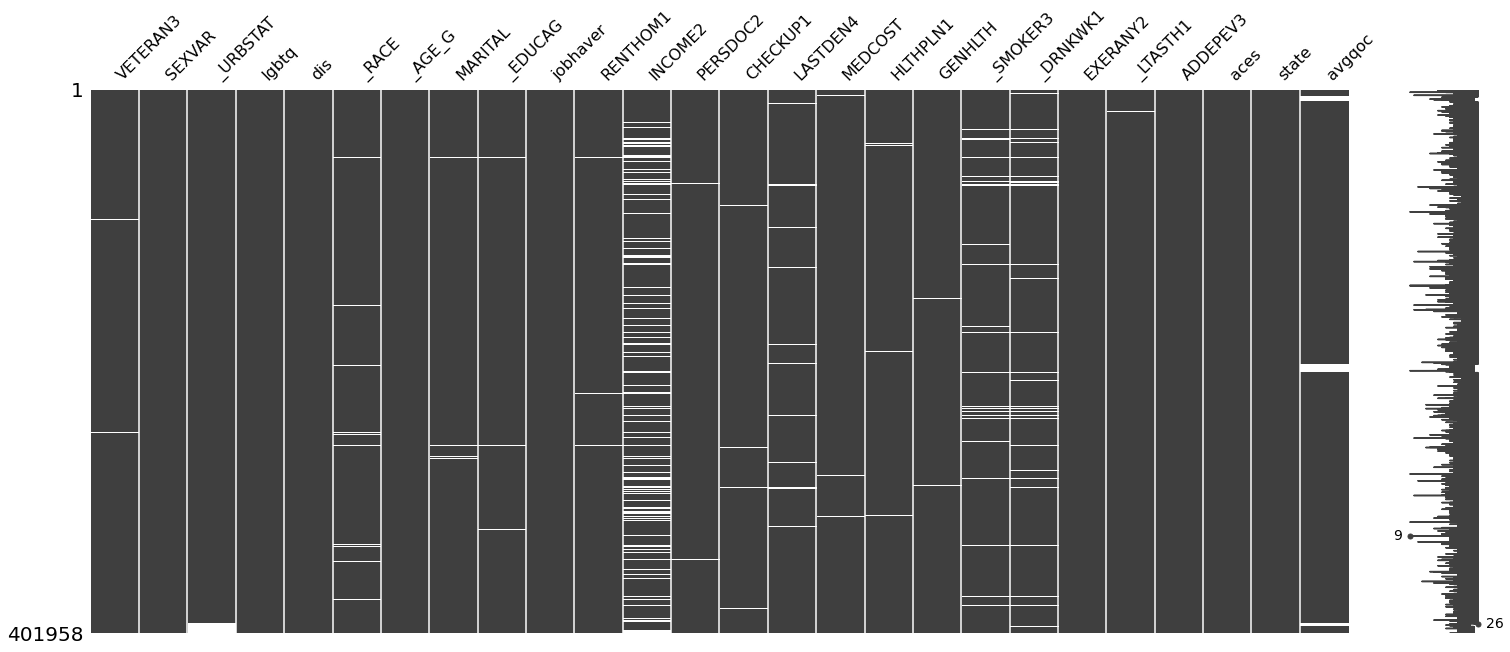

In [18]:
miss.matrix(dat) 

In [19]:
mar_dum = pd.get_dummies(dat["MARITAL"])
mar_dum= mar_dum.rename(columns={1: "married", 2: "divorced", 3:"widowed", 4:'separated', 5:'single', 6:'coupled'})
mar_dum = mar_dum.drop(['separated'],axis=1) #baseline
dat = pd.concat([dat.drop(['MARITAL'],axis=1),mar_dum],axis=1)


#emp_dum = pd.get_dummies(dat["EMPLOY1"])
#emp_dum= emp_dum.rename(columns={1: "employed", 2: "selfemployed", 3:"worklessover1", 4:'worklessunder1', 5:'homemaker', 6:'student',7:'retired',8:'unable'})
#emp_dum = emp_dum.drop(['homemaker'],axis=1) #baseline
#dat = pd.concat([dat.drop(['EMPLOY1'],axis=1),emp_dum],axis=1)


home_dum = pd.get_dummies(dat["RENTHOM1"])
home_dum= home_dum.rename(columns={1: "own", 2: "rent", 3:"other"})
home_dum = home_dum.drop(['other'],axis=1) #baseline
dat = pd.concat([dat.drop(['RENTHOM1'],axis=1),home_dum],axis=1)


race_dum = pd.get_dummies(dat["_RACE"])
race_dum= race_dum.rename(columns={1: "white", 2: "black", 3:"aian", 4:'asian', 5:'nhpi', 6:'other',7:'multi',8:'hispanic'})
race_dum = race_dum.drop(['nhpi'],axis=1) #baseline
dat = pd.concat([dat.drop(['_RACE'],axis=1), race_dum],axis=1)

C:\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 179960 rows containing non-finite values.


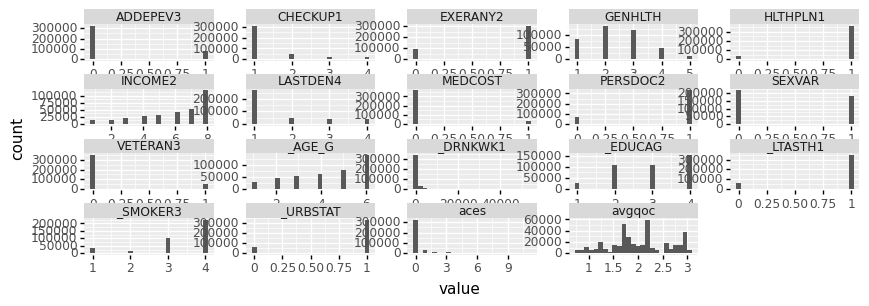

<ggplot: (108023036444)>

In [20]:
# Plot the continuous Variables 
d = dat.select_dtypes(include=("int64", "float64")).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75})
)

C:\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 30691 rows containing non-finite values.


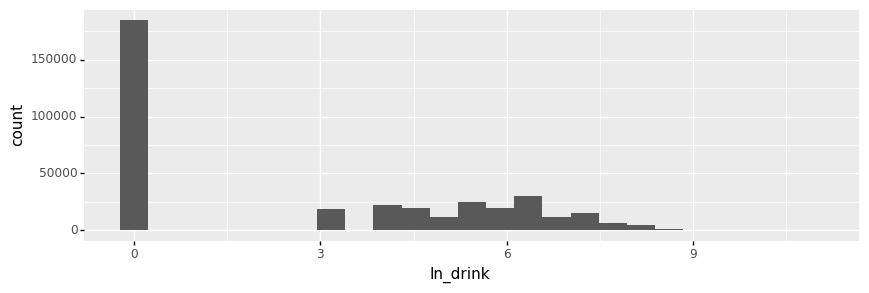

<ggplot: (108014723735)>

In [21]:
#drinking looks goofy so I'm going to try logging it

d = dat.copy()
d['ln_drink'] =  np.log(d['_DRNKWK1'] + 1)
(
    ggplot(d,aes(x="ln_drink")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [22]:
#turning drinks/wk into a categorical variable because of that big chunk of people at 0
median_drink = dat.loc[dat['_DRNKWK1'] > 0,'_DRNKWK1'].median()
dat['drink'] =  np.where(dat['_DRNKWK1']==0,0,np.where(dat['_DRNKWK1'] <= median_drink,1,2))

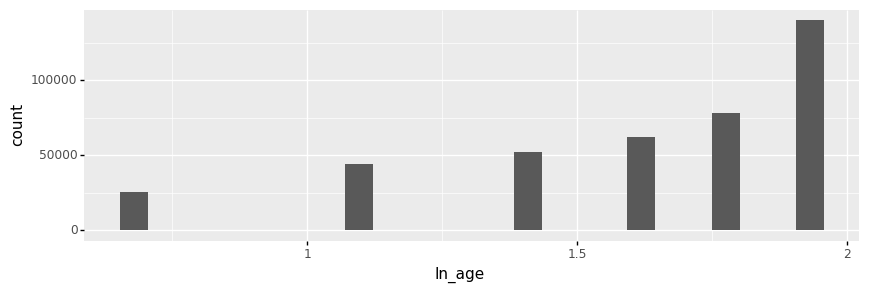

<ggplot: (108013087365)>

In [23]:
#age is very skewed - logging it does not help much!

d = dat.copy()
d['ln_age'] =  np.log(d['_AGE_G'] + 1)
(
    ggplot(d,aes(x="ln_age")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

## state level data - clean & merge 

In [24]:
kff = pd.read_csv('KFF.csv')
bonus = pd.read_csv('raw_data.csv')
kff.State[kff.State=="Dist. of Columbia"] = "District of Columbia"
kff = kff.merge(bonus, how='left',left_on="State", right_on="Location")

<ipython-input-24-a15627fb5d0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
kff=kff.replace(["None","No limit"], 0)
kff=kff.replace(["%","\$",","], "", regex=True)
kff=kff.replace(["N/A","-"], np.NaN)
kff=kff.drop(columns=['Location'])

<AxesSubplot:>

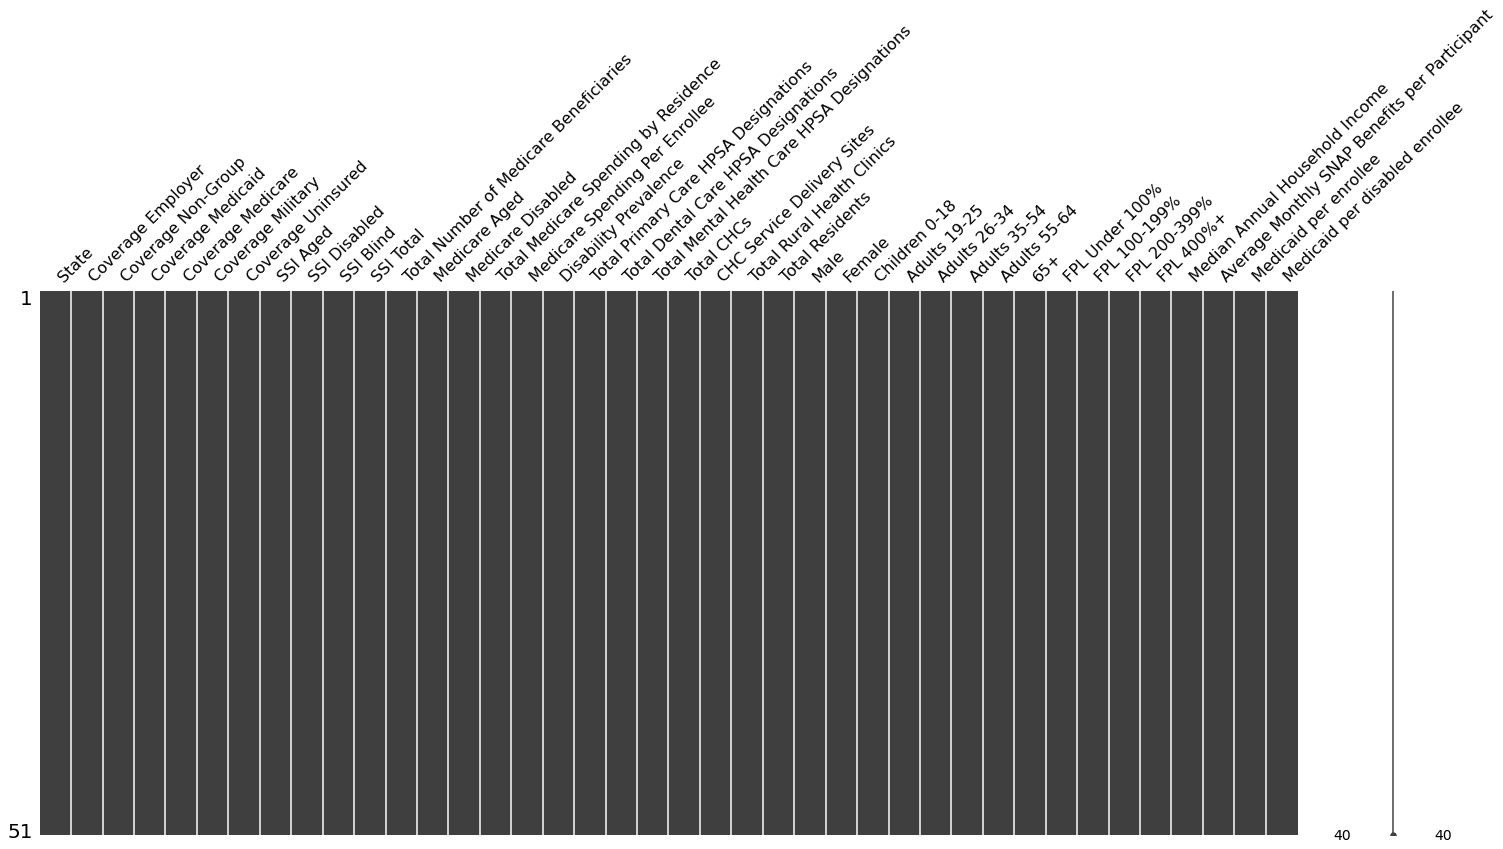

In [26]:
miss.matrix(kff) 

In [27]:
stategrp = (dat
            .filter(['state','GENHLTH','avgqoc'])
            .groupby(["state"])
            .mean(["GENHLTH",'avgqoc'])
            .reset_index()
      )
stategrp


statelvl = kff.merge(stategrp, how='left',left_on="State", right_on="state")
statelvl = statelvl.drop(columns=['state'])
statelvl.to_csv('cleanstate.csv', index=False)

In [28]:
bonus=bonus.replace(["%","\$",","], "", regex=True)
dat= dat.merge(bonus, how='left',left_on="state", right_on="Location")

In [30]:
#export merged data 
dat=dat.drop(columns=['Location'])
dat.to_csv('cleanind.csv', index=False)